In [1]:
import deepxde as dde
import numpy as np
from deepxde.backend import pytorch
import torch
import matplotlib.pyplot as plt
from SIRD_deepxde_class import SIRD_deepxde_net
from SIRD_deepxde_class import Plot

np.random.seed(0)

Using backend: pytorch



In [2]:
alpha_real = 0.2
beta_real = 0.05
gamma_real = 0.01

total  [2.02612971e+05 1.48624732e+03 3.76566865e+06 7.84673325e+05]
total  4754441.188794797


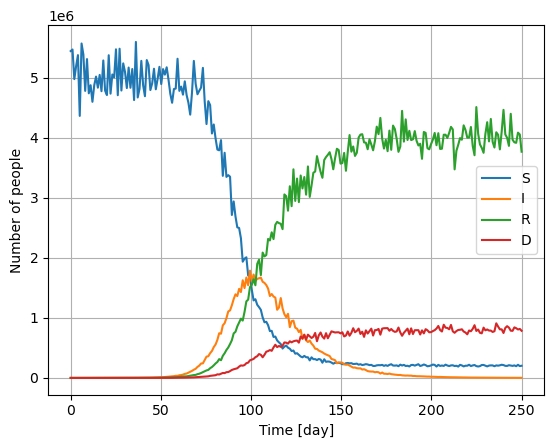

In [3]:
import ODE_SIR
solver = ODE_SIR.ODESolver()
t_synth, wsol_synth, N = solver.solve_SIRD(alpha_real, beta_real, gamma_real)
wsol_synth = solver.add_noise(wsol_synth, scale_pct=0.05)
solver.plot_SIRD(t_synth, wsol_synth)

In [4]:
max_timestep = 100
t_bool = t_synth < max_timestep
t = t_synth[t_bool]
wsol = wsol_synth[t_bool]
model = SIRD_deepxde_net(t, wsol)
model.init_model(print_every=1000)
model.train_model(iterations=12000)
alpha_nn, beta_nn, gamma_nn = model.get_best_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model.set_synthetic_data(t_synth, wsol_synth)
model.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Compiling model...
'compile' took 0.000782 s

Training model...

Step      Train loss                                                                                                                                                          Test loss                                                                                                                                                           Test metric
0         [4.70e-03, 5.04e-04, 1.92e-03, 6.51e-03, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 5.21e-01, 1.17e-02, 4.45e-01, 1.12e+00, 7.14e-02, 5.65e-02, 9.26e-01, 1.30e+00]    [4.70e-03, 5.04e-04, 1.92e-03, 6.51e-03, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 5.21e-01, 1.17e-02, 4.45e-01, 1.12e+00, 7.14e-02, 5.65e-02, 9.26e-01, 1.30e+00]    []  
1000      [1.39e-05, 8.11e-07, 7.31e-06, 1.37e-06, 7.30e-09, 3.25e-06, 6.89e-07, 9.15e-07, 2.22e-03, 6.83e-05, 3.82e-04, 2.42e-05, 3.19e-04, 5.05e-05, 2.55e-05, 3.85e-07]    [1.39e-05, 8.11e-07, 7.31e-06, 1.37e-06, 7.30e-09, 3.25e-06, 6.89e-0

AttributeError: 'SIRD_deepxde_net' object has no attribute 'get_predicted_params'

In [5]:
alpha_nn, beta_nn, gamma_nn = model.get_best_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model.set_synthetic_data(t_synth, wsol_synth)
model.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

In [6]:
max_timestep = 85
t_bool = t_synth < max_timestep
t = t_synth[t_bool]
wsol = wsol_synth[t_bool]
model85 = SIRD_deepxde_net(t, wsol)
model85.init_model(print_every=1000)
model85.train_model(iterations=12000)
alpha_nn, beta_nn, gamma_nn = model85.get_best_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model85.set_synthetic_data(t_synth, wsol_synth)
model85.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Compiling model...
'compile' took 0.000344 s

Training model...

Step      Train loss                                                                                                                                                          Test loss                                                                                                                                                           Test metric
0         [1.36e-03, 8.34e-03, 4.01e-03, 3.92e-03, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 2.36e+00, 1.17e-01, 6.89e-01, 4.38e-01, 1.67e+00, 2.76e-01, 6.39e-01, 4.53e-01]    [1.36e-03, 8.34e-03, 4.01e-03, 3.92e-03, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 2.36e+00, 1.17e-01, 6.89e-01, 4.38e-01, 1.67e+00, 2.76e-01, 6.39e-01, 4.53e-01]    []  
1000      [1.73e-05, 4.60e-06, 1.87e-06, 1.98e-06, 2.61e-06, 1.14e-06, 5.74e-07, 7.44e-06, 3.13e-03, 1.22e-04, 4.42e-05, 1.10e-05, 5.56e-04, 1.55e-04, 3.68e-05, 1.58e-10]    [1.73e-05, 4.60e-06, 1.87e-06, 1.98e-06, 2.61e-06, 1.14e-06, 5.74e-0

In [7]:
max_timestep = 75
t_bool = t_synth < max_timestep
t = t_synth[t_bool]
wsol = wsol_synth[t_bool]
model75 = SIRD_deepxde_net(t, wsol)
model75.init_model(print_every=1000)
model75.train_model(iterations=12000)
alpha_nn, beta_nn, gamma_nn = model75.get_best_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model75.set_synthetic_data(t_synth, wsol_synth)
model75.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Compiling model...
'compile' took 0.000519 s

Training model...

Step      Train loss                                                                                                                                                          Test loss                                                                                                                                                           Test metric
0         [1.15e-03, 1.32e-02, 3.02e-03, 4.33e-02, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 1.35e+00, 2.20e-01, 5.51e-02, 9.25e-01, 1.20e+00, 1.58e-01, 5.17e-02, 9.99e-01]    [1.15e-03, 1.32e-02, 3.02e-03, 4.33e-02, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 1.35e+00, 2.20e-01, 5.51e-02, 9.25e-01, 1.20e+00, 1.58e-01, 5.17e-02, 9.99e-01]    []  
1000      [8.72e-06, 6.99e-07, 8.95e-07, 4.59e-07, 4.45e-09, 5.94e-09, 1.24e-08, 3.53e-08, 2.37e-03, 1.41e-04, 1.77e-05, 1.66e-06, 4.84e-05, 2.44e-05, 3.00e-06, 4.10e-07]    [8.72e-06, 6.99e-07, 8.95e-07, 4.59e-07, 4.45e-09, 5.94e-09, 1.24e-0

# plot

In [8]:
values_to_plot = ['I']
plot_model = Plot(model, values_to_plot=values_to_plot)
plot_model85 = Plot(model85, values_to_plot=values_to_plot)
plot_model75 = Plot(model75, values_to_plot=values_to_plot)

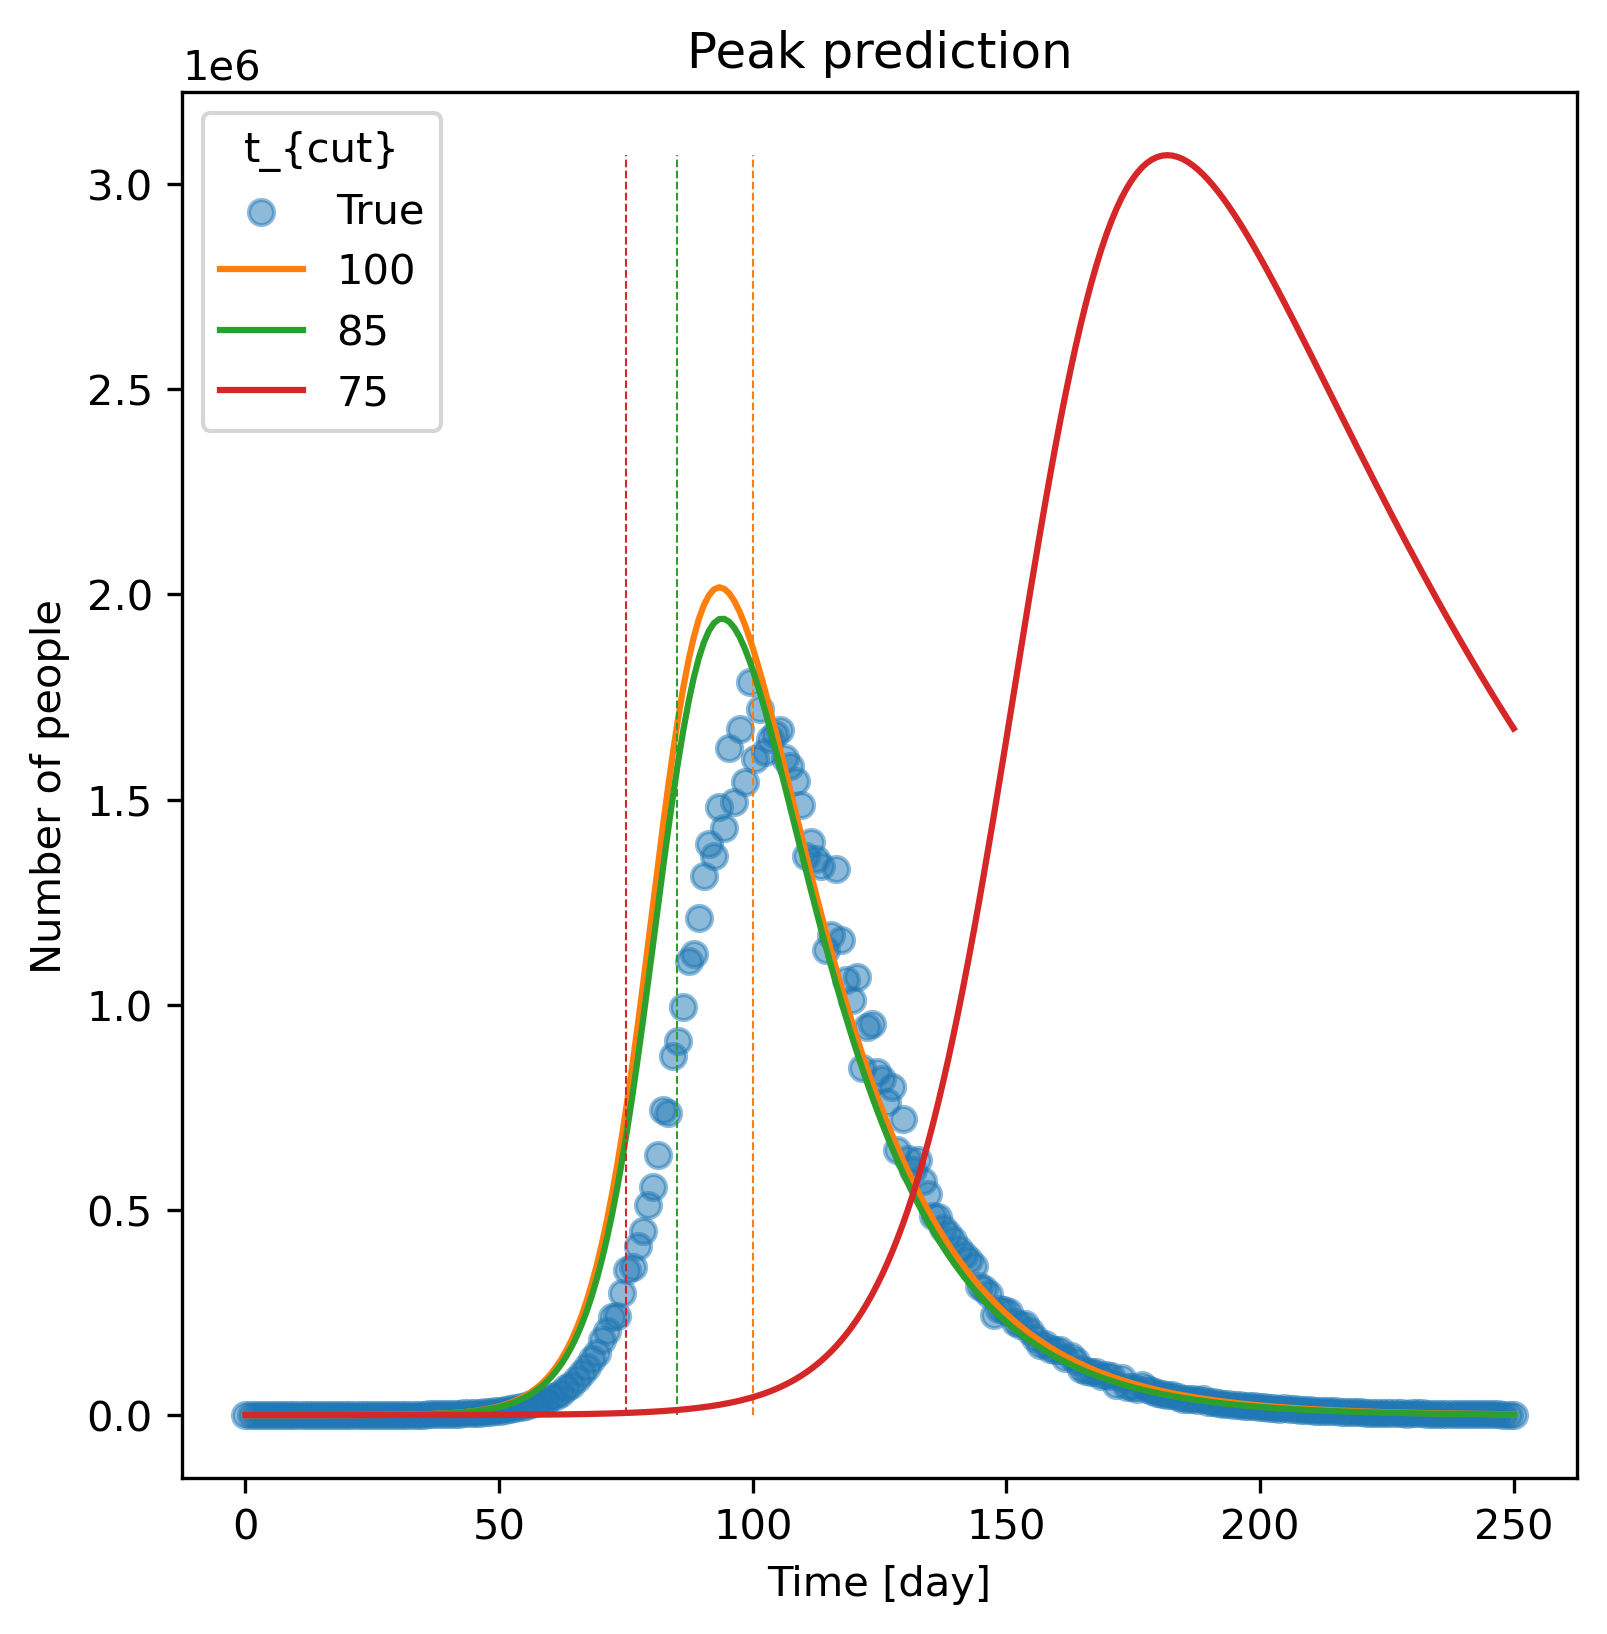

In [19]:
fig, ax = plt.subplots(dpi=300, figsize=(6,6))
max_val = max(plot_model.model.wsol_synth[:,1].max(), plot_model.model.wsol_nn_synth[:,1].max(), 
             plot_model85.model.wsol_nn_synth[:,1].max(), plot_model75.model.wsol_nn_synth[:,1].max())
line = ax.scatter(plot_model.model.t_nn_synth, plot_model.model.wsol_synth[:,1], color=plot_model.colors[0], label='True',alpha=0.5)
line = ax.plot(plot_model.model.t_synth, plot_model.model.wsol_nn_synth[:,1], color=plot_model.colors[1], label=100)
ax.vlines(x=100, ymin=0,ymax=max_val, color=plot_model.colors[1], linestyle='--', linewidth=0.5)
line = ax.plot(plot_model85.model.t_synth, plot_model85.model.wsol_nn_synth[:,1], color=plot_model85.colors[2], label=85)
ax.vlines(x=85, ymin=0,ymax=max_val, color=plot_model.colors[2], linestyle='--', linewidth=0.5)
line = ax.plot(plot_model75.model.t_synth, plot_model75.model.wsol_nn_synth[:,1], color=plot_model75.colors[3], label=75)
ax.vlines(x=75, ymin=0,ymax=max_val, color=plot_model.colors[3], linestyle='--', linewidth=0.5)
ax.legend(title='t_{cut}')
ax.set_title('Peak prediction')
ax.set_xlabel('Time [day]')
ax.set_ylabel('Number of people')
plt.savefig('Peak prediction',bbox_inches='tight')